<a href="https://colab.research.google.com/github/gravescoding/musiccomputing2/blob/main/assignments/labAssignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries

# import audio files

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg
!git clone https://github.com/jcdevaney/musicComputing2025.git



Cloning into 'musicComputing2025'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 180 (delta 34), reused 5 (delta 3), pack-reused 113 (from 1)
Receiving objects: 100% (180/180), 28.59 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [3]:
def plotTimeFreq(sig,sr,title,winSize,specType,fig):

    # copy from filters.ipynb

        # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr

    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion

    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Create a new figure (using the figure number passed in as an argument)
    plt.figure(fig)

    # Create the first subplot
    plt.subplot(2,1,1)

    # Plot the time-domain representation of the inputted audio signal
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Create the second subplot
    plt.subplot(2,1,2)

    # Plot the frequency-domain representatio of the inputted audio signal
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show


In [9]:
def filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig):

  if filtType == 'low': filterFreq = freq / (sr / 2)
  elif filtType == 'high': filterFreq = freq / (sr / 2)
  elif filtType == 'bandpass': filterFreq = [freq[0] / (sr / 2), freq[1] / (sr / 2)]
  elif filtType == 'bandstop': filterFreq = [freq[0] / (sr / 2), freq[1] / (sr / 2)]



  filtTypeMap = {'low': 'lowpass', 'high': 'highpass', 'bandpass': 'bandpass', 'bandstop': 'bandstop'}
  b, a = sg.butter(order, filterFreq, filtTypeMap[filtType])

  sig_fil1a = sg.filtfilt(b, a, sig)

  plotTimeFreq(sig_fil1a, sr, filtType, winSize, specType, fig)

  return sig_fil1a

In [10]:
def allFilters(sig,sr,freq,width,order,winSize,specType):
        sig_lp = filterSignal(sig,sr,freq,'low',order,winSize,specType,1)
        sig_hp = filterSignal(sig,sr,freq,'high',order,winSize,specType,2)
        sig_bp = filterSignal(sig,sr,[freq-width,freq+width],'bandpass',order,winSize,specType,3)
        sig_bs = filterSignal(sig,sr,[freq-width,freq+width],'bandstop',order,winSize,specType,4)

        return sig_lp, sig_hp, sig_bp, sig_bs

    # call filterSignal() to run a low-pass filter on the inputting signal using
    # the inputting filter frequency and filter order
    # set fig equal to 1


    # call filterSignal() to run a high-pass filter on the inputting signal
    # using the inputting filter frequency and filter order
    # set fig equal to 2

    #call filterSignal() to run a band-pass filter on the inputting signal using
    # the inputting filter frequency and filter order – filter frequency will be
    # calculated using the inputted width parameter like this:
    #                   [freq-width,freq+width]
    # set fig equal to 3

    # call filterSignal() to run a band-stop filter on the inputting signal using
    # the inputting filter frequency and filter order – filter frequency will be
    # calculated using the inputted width parameter like this:
    #                   [freq-width,freq+width]
    # set fig equal to 4


    # return the output of the low-pass, high-pass, bandpass, and bandstop
    # filtered signals


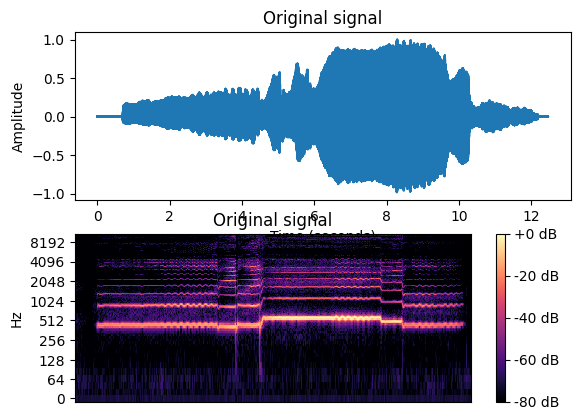

In [11]:
sig , sr = librosa.load('musicComputing2025/audioFiles/avm.wav')
winSize = 1024
specType = 'log'
fig = 1

# Plot original signal
plotTimeFreq(sig,sr,'Original signal',winSize,specType,fig)

# Play original signal
IPython.display.Audio(data=sig, rate=sr)

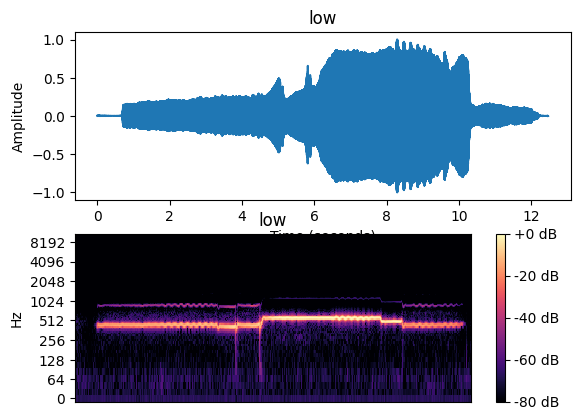

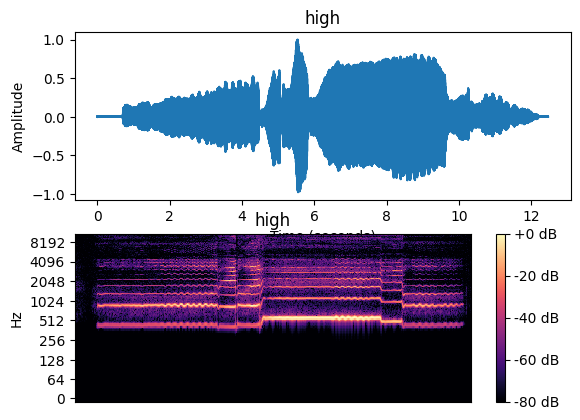

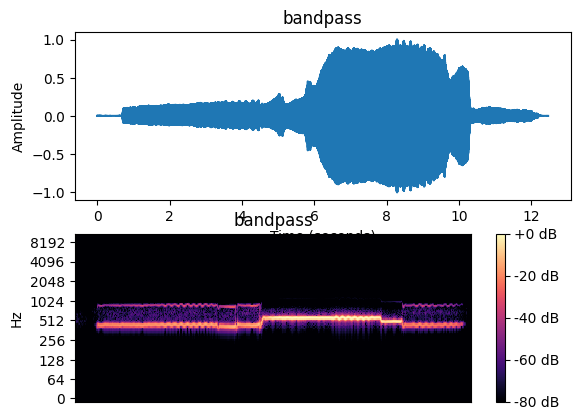

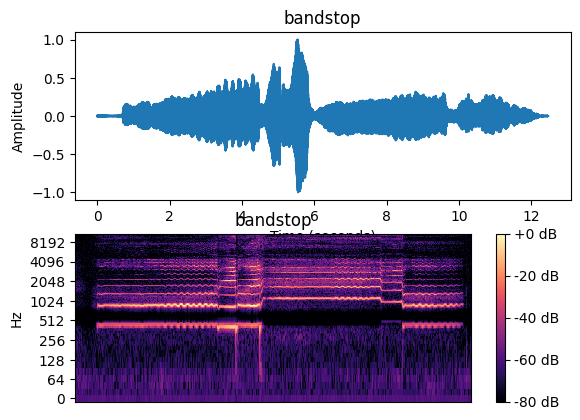

In [16]:
freq = 600
width = 200
order = 4

# call allFilters() and save the output as sig_lp, sig_hp, sig_bp, sig_bs
sig_lp, sig_hp, sig_bp, sig_bs = allFilters(sig, sr, freq, width, order, winSize, specType)

In [13]:
# play the low-pass version of the signal with IPython.display.Audio()
IPython.display.Audio(data=sig, rate=sr)

In [30]:
# play the high-pass version of the signal with IPython.display.Audio()
IPython.display.Audio(data=sig, rate=sr)

In [ ]:
# play the band-pass version of the signal with IPython.display.Audio()
IPython.display.Audio(data=sig, rate=sr)

In [15]:
# play the band-stop version of the signal with IPython.display.Audio()
IPython.display.Audio(data=sig, rate=sr)